In [5]:
#gerekli kurulumlar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split #veri eğitimi
from sklearn.preprocessing import StandardScaler #özellik ölçeklendirme
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (                          # Model performans metrikleri
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
)

plt.style.use("ggplot")  # Grafiklerde ggplot tarzı estetik tema
sns.set_palette("pastel")  # Seaborn renk paletini pastel yap

print("✅ Kütüphaneler yüklendi!")

✅ Kütüphaneler yüklendi!


In [10]:
#veri yükleme

from google.colab import files
files.upload()

df=pd.read_csv("cleaned_telco_churn.csv")
print("Veri boyutu:",df.shape)
X=df.drop(columns=["Churn"])
y=df["Churn"]
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42,stratify=y
)
print(f"Eğitim boyutu{X_train.shape},Test veri boyutu:{X_test.shape}")

Saving cleaned_telco_churn.csv to cleaned_telco_churn (3).csv
Veri boyutu: (7043, 31)
Eğitim boyutu(5634, 30),Test veri boyutu:(1409, 30)


In [13]:
#öznitelik ölçekleme
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

print("Veriler ölçeklendi")

Veriler ölçeklendi


In [14]:
#model kurulumu ve eğitimi
model=LogisticRegression(max_iter=1000,class_weight='balanced',random_state=42)
model.fit(X_train_scaled,y_train)
print("Model eğitimi tamamlandı")

Model eğitimi tamamlandı


In [15]:
# 4) TAHMİN & METRİKLER

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_pred_proba)

print(f"""
🎯 Model Performansı
---------------------
Accuracy : {accuracy:.3f}
Precision: {precision:.3f}
Recall   : {recall:.3f}
F1-Score : {f1:.3f}
ROC-AUC  : {roc_auc:.3f}
""")


🎯 Model Performansı
---------------------
Accuracy : 0.740
Precision: 0.507
Recall   : 0.786
F1-Score : 0.616
ROC-AUC  : 0.841



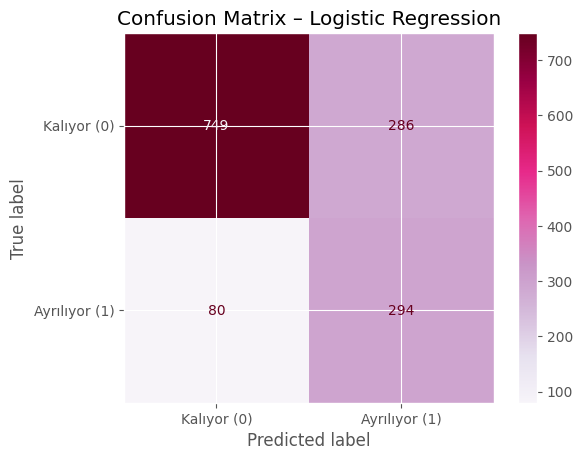

In [16]:

# 5) KARMAŞA MATRİSİ (Confusion Matrix)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Kalıyor (0)", "Ayrılıyor (1)"])
disp.plot(cmap="PuRd")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()


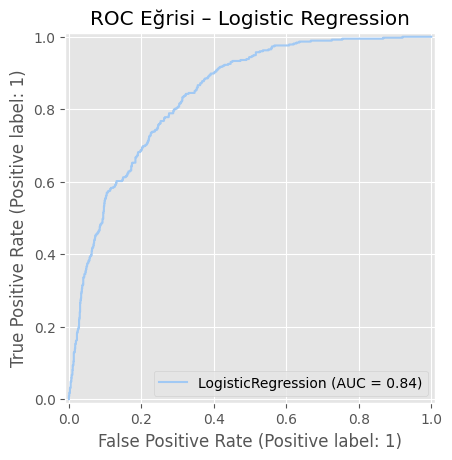

In [17]:

# 6) ROC EĞRİSİ

RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("ROC Eğrisi – Logistic Regression")
plt.show()


In [18]:

# 7) ÖZELLİK (FEATURE) ETKİSİ

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("Churn üzerinde en güçlü pozitif etkiye sahip ilk 10 özellik:")
display(coef_df.head(10))

print("\nChurn olasılığını AZALTAN (negatif etki) özellikler:")
display(coef_df.tail(10))


Churn üzerinde en güçlü pozitif etkiye sahip ilk 10 özellik:


,Feature,Coefficient
10,InternetService_Fiber optic,0.808897
3,TotalCharges,0.494748
23,StreamingMovies_Yes,0.285948
21,StreamingTV_Yes,0.273209
9,MultipleLines_Yes,0.201165
28,PaymentMethod_Electronic check,0.188783
26,PaperlessBilling_Yes,0.164703
17,DeviceProtection_Yes,0.058287
0,SeniorCitizen,0.056636
7,PhoneService_Yes,0.024336



Churn olasılığını AZALTAN (negatif etki) özellikler:


,Feature,Coefficient
14,OnlineBackup_No internet service,-0.099096
16,DeviceProtection_No internet service,-0.099096
20,StreamingTV_No internet service,-0.099096
22,StreamingMovies_No internet service,-0.099096
6,Dependents_Yes,-0.104292
13,OnlineSecurity_Yes,-0.114503
24,Contract_One year,-0.296706
25,Contract_Two year,-0.617746
2,MonthlyCharges,-1.039440
1,tenure,-1.159048


In [19]:

# 8) MODELİ KAYDETME

import joblib
joblib.dump(model, "logreg_telco_model.pkl")
joblib.dump(scaler, "scaler_telco.pkl")

print("✅ Model ve scaler kaydedildi: logreg_telco_model.pkl, scaler_telco.pkl")


✅ Model ve scaler kaydedildi: logreg_telco_model.pkl, scaler_telco.pkl
